<a href="https://colab.research.google.com/github/BelenKohl/SRMP/blob/main/Dec19_Kohl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/BelenKohl/SRMP.git

Cloning into 'SRMP'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (39/39), 559.87 KiB | 3.35 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('Gaia_Prot_cmatch.csv')

<ipython-input-3-2bffda7b3f7e>:1: DtypeWarning: Columns (39,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Gaia_Prot_cmatch.csv')


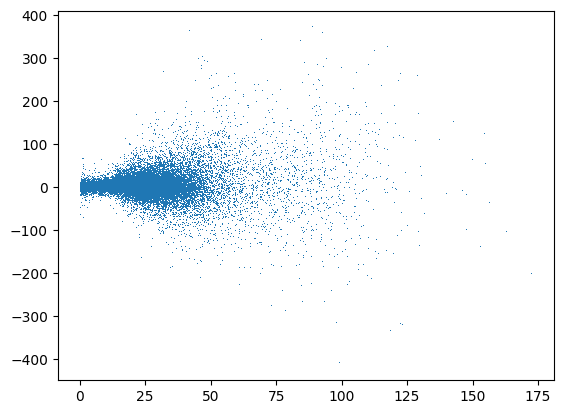

In [6]:
plt.plot(df['Prot'], df['pmra'], ',')

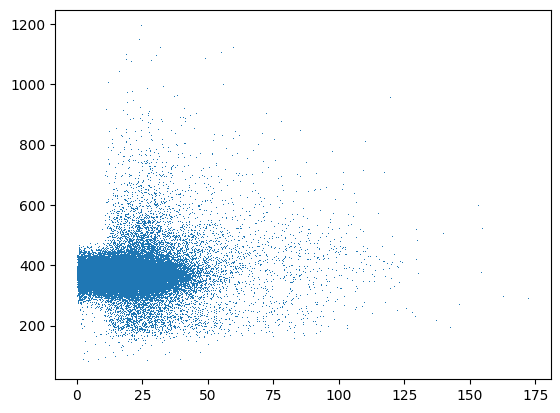

In [4]:
plt.plot(df['Prot'], df['astrometric_n_good_obs_al'], ',')

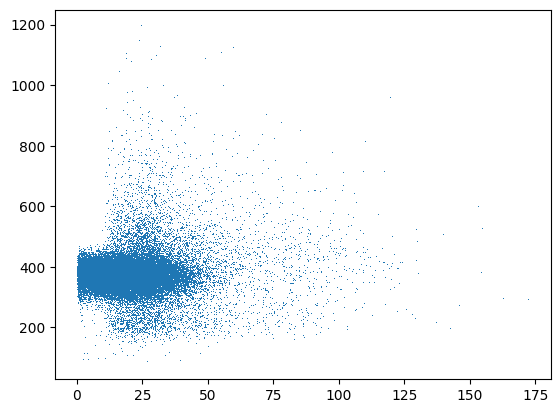

In [6]:
plt.plot(df['Prot'], df['astrometric_n_obs_al'], ',')

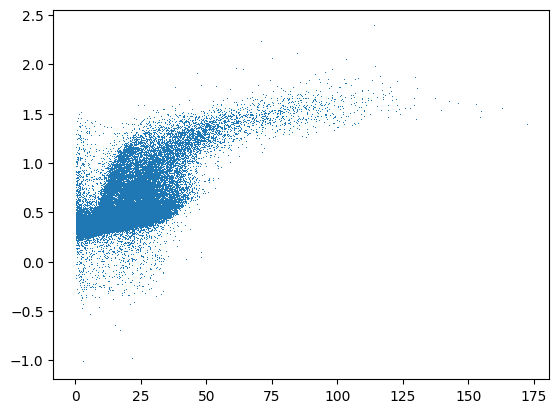

In [8]:
plt.plot(df['Prot'], df['bp_g'], ',')

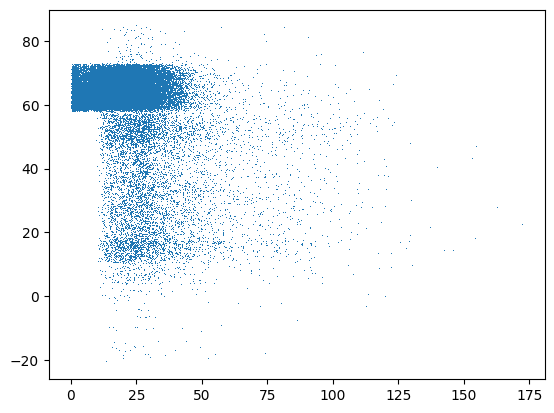

In [10]:
plt.plot(df['Prot'], df['ecl_lat'], ',')

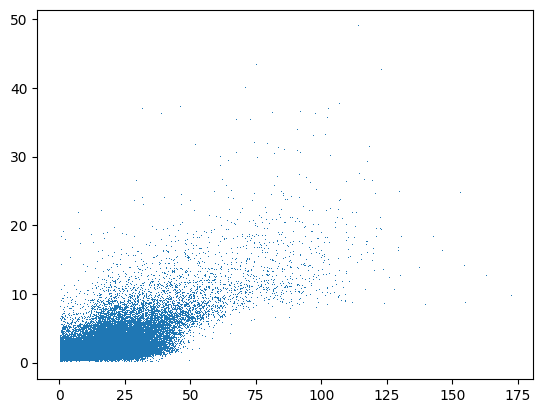

In [30]:
plt.plot(df['Prot'], df['parallax'], ',')

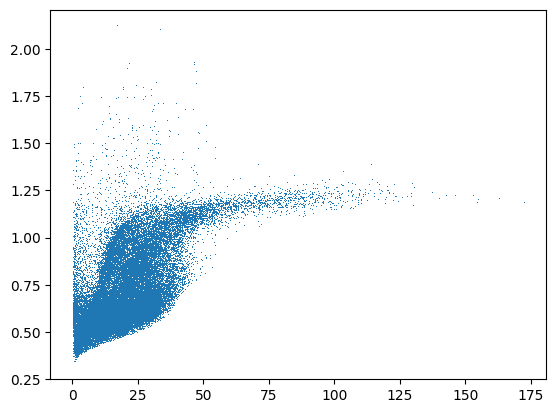

In [13]:
plt.plot(df['Prot'], df['g_rp'], ',')

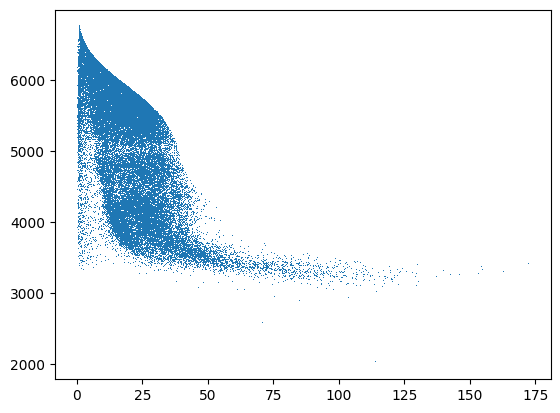

In [16]:
plt.plot(df['Prot'], df['teff_calc'], ',')

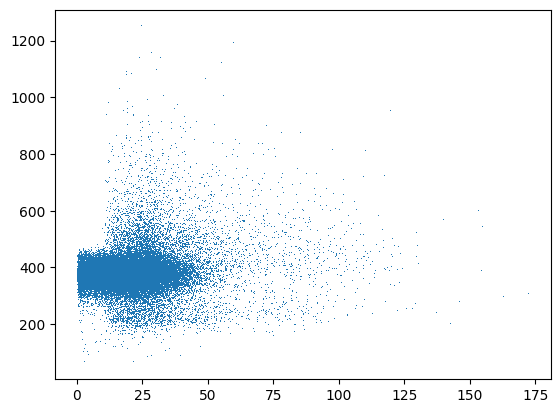

In [19]:
plt.plot(df['Prot'], df['phot_g_n_obs'], ',')

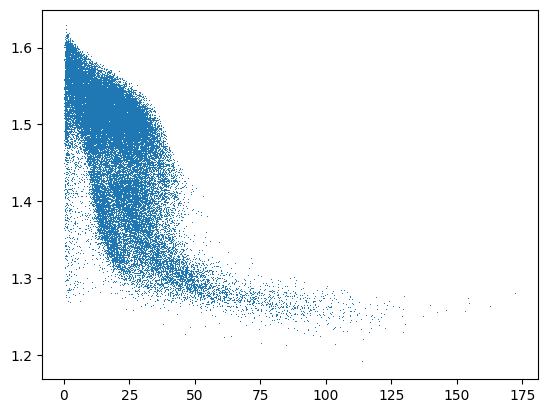

In [28]:
plt.plot(df['Prot'], df['nu_eff_used_in_astrometry'], ',')

In [31]:
import pandas as pd
import numpy as np
def train(y, X):
    """

    Args:
        y (array): An Nstar array of rotation periods.
        X (array): An Nstar x NX array of features.

    Returns:
        weights (array): The array of weights of length NX + 1.

    """
    A = np.concatenate((np.ones((len(X), 1)), X), axis=1)  # Shape: Nstars x Nfeatures (incl crossterms)
    AT = A.T
    ATA = np.dot(AT, A)

    weights = np.linalg.solve(ATA, np.dot(AT, y))
    return weights

def normalize(x):
    return (x-min(x))/(max(x)-min(x))

In [32]:
features= [df['pmra'], df['astrometric_n_good_obs_al'], df['astrometric_n_obs_al'], df['bp_g'], df['ecl_lat'], df['parallax'], df['g_rp'], df['teff_calc'], df['phot_g_n_obs'], df['nu_eff_used_in_astrometry']]

In [34]:
m=np.isfinite(df['pmra'].values)
for f in features[1:]:
  m &= np.isfinite(f.values)

In [35]:
df=df.iloc[m]
print(np.shape(df), np.shape(df))

(42701, 103) (42701, 103)


In [36]:
y=df.Prot.values

In [37]:
args= normalize(df['pmra']), normalize(df['astrometric_n_good_obs_al']), normalize(df['astrometric_n_obs_al']), normalize(df['bp_g']), normalize(df['ecl_lat']), normalize(df['parallax']), normalize(df['g_rp']), normalize(df['teff_calc']), normalize(df['phot_g_n_obs']), normalize(df['nu_eff_used_in_astrometry'])

In [38]:
X=list(args)
X=np.array(X).T
names= ['pmra', 'astro_g', 'astro', 'bpg', 'ecllat', 'paralax', 'grp', 'teffcalc', 'obs', 'nueff']
X_names=list(names)
X_names=np.array(X_names).T
print(np.shape(X), len(args), len(names))

(42701, 10) 10 10


In [39]:
# Define the number of training and validating stars.
Ntrain = int(0.8*len(y))

# Choose stars at random and split.
shuffle_inds = np.arange(len(y))
np.random.shuffle(shuffle_inds)
train_inds = shuffle_inds[:Ntrain]
test_inds = shuffle_inds[Ntrain:]
y_train, X_train = y[train_inds], X[train_inds, :]
y_test, X_test = y[test_inds], X[test_inds, :]

In [40]:
weights=train(y_train, X_train)

In [48]:
A=np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)
y_predict=np.dot(weights.T, A.T)


Text(0, 0.5, 'predicted period')

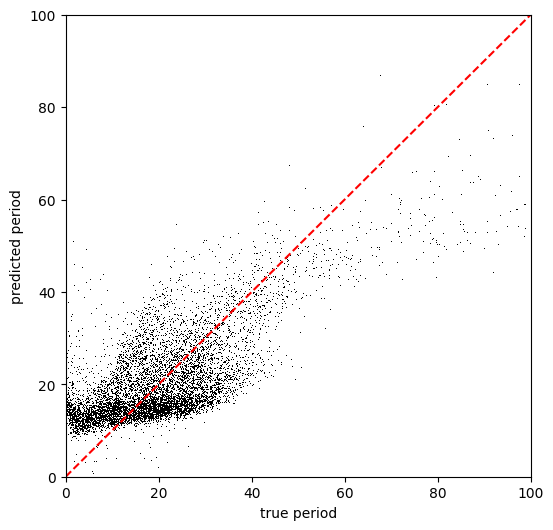

In [54]:
xs=np.linspace(0, 100, 10)
plt.figure(figsize=(6, 6), dpi=100)
plt.plot(y_test, y_predict.T, 'k,')
plt.plot(xs, xs, "r--")
plt.xlim (0, 100)
plt.ylim (0, 100)
plt.xlabel('true period')
plt.ylabel('predicted period')